# 1. Importing Visualization Libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# 2. Importing Dataset deaths_cases_gender.csv

In [4]:
# Define path

path = r'/Users/jacob/Desktop/Achievement 6'

In [5]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'deaths_cases_gender.csv'), index_col = False)

### Mixed-Type Data

In [6]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

In [7]:
# Describing the data types
df.dtypes

Unnamed: 0             int64
county_code          float64
county                object
state                 object
lat                  float64
long                 float64
date                  object
cases                  int64
state_code            object
deaths                 int64
male                   int64
female                 int64
median_age           float64
population             int64
female_percentage    float64
death_rate           float64
cases_rate           float64
month                  int64
year                   int64
dtype: object

In [8]:
# Remove unamed columns
df = df.drop(columns = ['Unnamed: 0'])


In [9]:
df.head()

,county_code,county,state,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage,death_rate,cases_rate,month,year
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0,26874,28326,37.8,55200,51.315217,0.0,0.0,1,2020
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0,26874,28326,37.8,55200,51.315217,0.0,0.0,1,2020
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0,26874,28326,37.8,55200,51.315217,0.0,0.0,1,2020
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0,26874,28326,37.8,55200,51.315217,0.0,0.0,1,2020
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0,26874,28326,37.8,55200,51.315217,0.0,0.0,1,2020


# 3. Exploring Relationships

In [10]:
df.columns

Index(['county_code', 'county', 'state', 'lat', 'long', 'date', 'cases',
       'state_code', 'deaths', 'male', 'female', 'median_age', 'population',
       'female_percentage', 'death_rate', 'cases_rate', 'month', 'year'],
      dtype='object')

In [11]:
# Create a subset 

df_sub = df[['county_code','cases','state_code','deaths', 'median_age','population']]

In [12]:
# Create a correlation matrix using pandas

df_sub.corr(numeric_only=True)

,county_code,cases,deaths,median_age,population
county_code,1.000000,-0.051511,-0.056305,0.021810,-0.062247
cases,-0.051511,1.000000,0.933243,-0.131068,0.760438
deaths,-0.056305,0.933243,1.000000,-0.123265,0.810607
median_age,0.021810,-0.131068,-0.123265,1.000000,-0.174124
population,-0.062247,0.760438,0.810607,-0.174124,1.000000


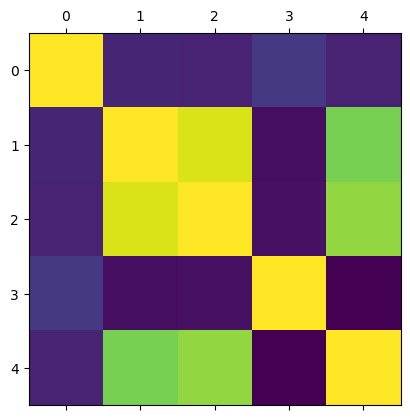

In [13]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_sub.corr(numeric_only=True))
plt.show()

In [14]:
# Checking current dir
cwd = os.getcwd()
cwd

'/Users/jacob/Desktop/Achievement 6/03 Scripts'

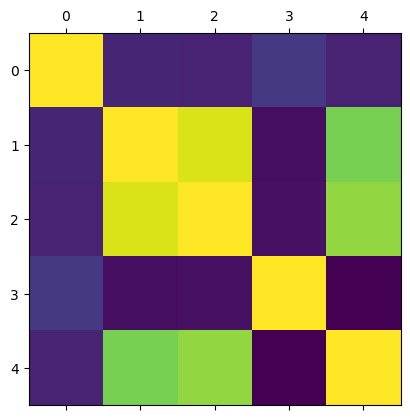

In [15]:
# Save figure
plt.matshow(df_sub.corr(numeric_only=True))
plt.savefig("out_ER.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

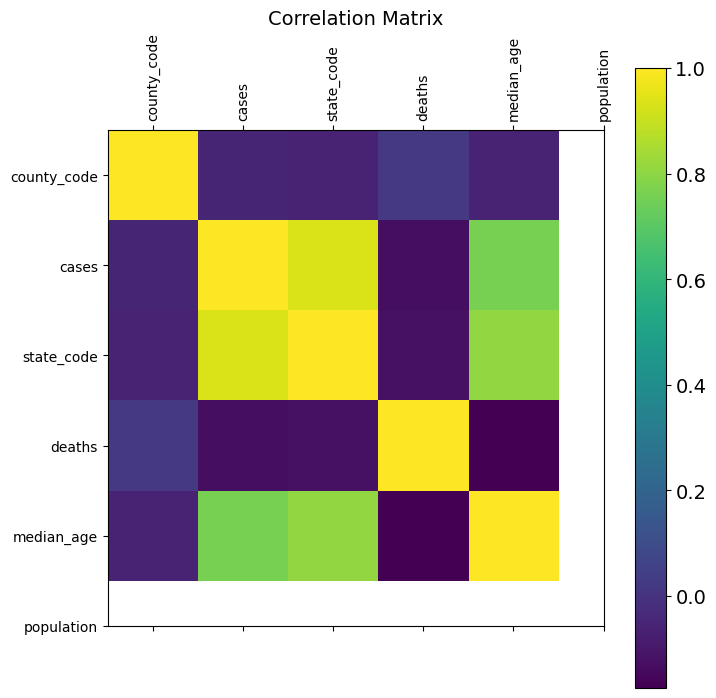

In [16]:
# add labels and a legend for the large correlation map

f = plt.figure(figsize=(8,8)) # figure size 
plt.matshow(df_sub.corr(numeric_only=True), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=10, rotation=90) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.savefig("corre_sub.png")  #save


## 3. Create a correlation matrix heatmap (colored) in seaborn



### Questions previously defined


#### • Which states saw the most COVID-19 impact?
#### • Does the size of the population affect the percentage of cases and deaths?


In [17]:
df_sub.columns

Index(['county_code', 'cases', 'state_code', 'deaths', 'median_age',
       'population'],
      dtype='object')

In [18]:
df_sub

,county_code,cases,state_code,deaths,median_age,population
0,1001.0,0,AL,0,37.8,55200
1,1001.0,0,AL,0,37.8,55200
2,1001.0,0,AL,0,37.8,55200
3,1001.0,0,AL,0,37.8,55200
4,1001.0,0,AL,0,37.8,55200
...,...,...,...,...,...,...
3480815,56045.0,1880,WY,22,42.9,7100
3480816,56045.0,1880,WY,22,42.9,7100
3480817,56045.0,1880,WY,22,42.9,7100
3480818,56045.0,1884,WY,22,42.9,7100


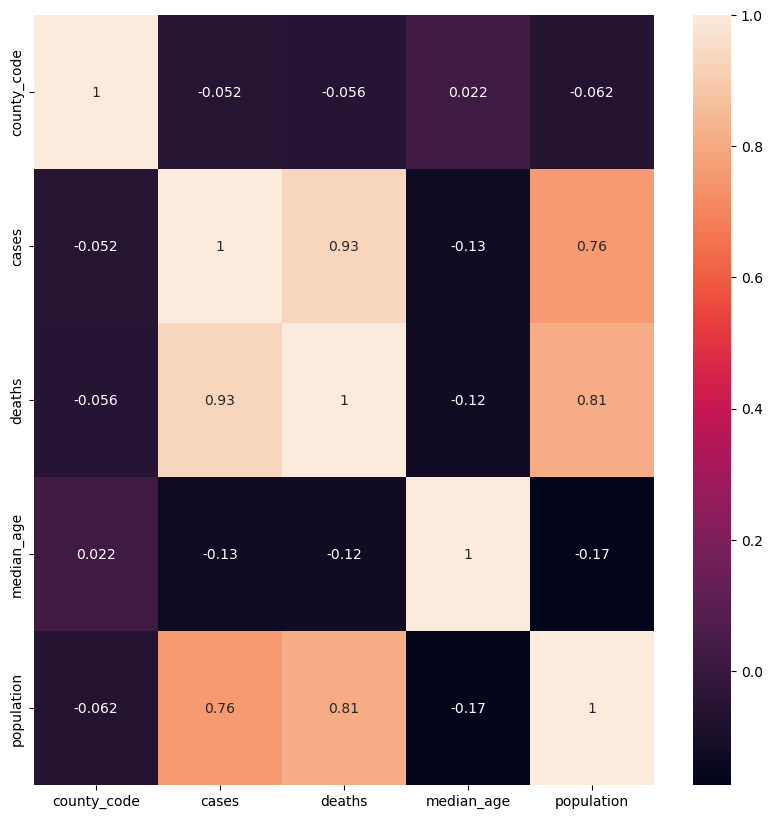

In [19]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(numeric_only=True), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

## Discussing the results

#### This coefficients  are correlation coefficients, which indicate the strength and direction of the linear relationship between pairs of variables. The coefficient values range from -1 to 1, with:

#### - A positive coefficient (between 0 and 1) indicates a positive correlation, meaning that as one variable increases, the other tends to increase as well.

#### - A negative coefficient (between -1 and 0) indicates a negative correlation, meaning that as one variable increases, the other tends to decrease.

#### - A coefficient of 0 indicates no linear correlation between the variables.

#### Let's discuss the meaning of these coefficients in terms of the relationships between the variables:

#### 1. Cases vs deaths = 0.93
#####   - There is a very strong positive correlation (0.93) between the number of COVID-19 cases and the number of deaths. This suggests that as the number of cases increases, the number of deaths also tends to increase, indicating a strong association.

#### 2. Cases vs median_age = -0.13
#####   - There is a weak negative correlation (-0.13) between the number of COVID-19 cases and the median age. This suggests that areas with a younger population tend to have slightly more reported cases, but the correlation is not very strong.

#### 3. Cases vs population = 0.76
#####   - There is a strong positive correlation (0.76) between the number of COVID-19 cases and the total population. This indicates that areas with larger populations tend to have more reported cases.

#### 4. Deaths vs population = 0.81
#####   - There is a very strong positive correlation (0.81) between the number of COVID-19 deaths and the total population. This indicates that areas with larger populations tend to have more reported deaths.

#### 5. Deaths vs median age = -0.12
#####   - There is a weak negative correlation (-0.12) between the number of COVID-19 deaths and the median age. This suggests that areas with a younger population tend to have slightly more reported deaths, but the correlation is not very strong.

#### Keeping in mind that correlation does not imply causation, and these coefficients only measure the strength and direction of linear relationships. Other factors and variables not included in this analysis may also influence these relationships.

## 4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

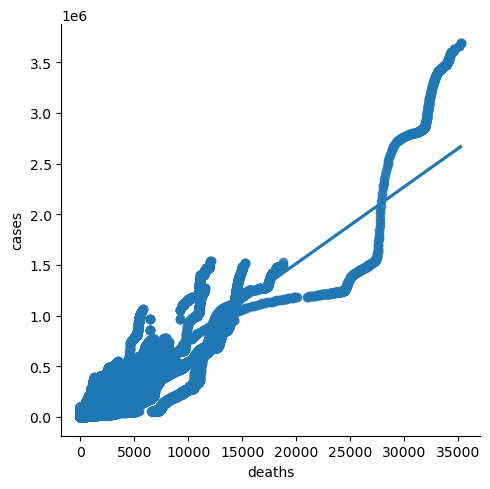

In [16]:
# Create a scatterplot for the "cases" and "deaths" columns in seaborn

sns.lmplot(x = 'deaths', y = 'cases', data = df_sub)

## Discusing the results
Overall the graphic suggest that there is a positive linear relationship between the variables 'cases' and 'deaths,' with the 'cases' variable explaining a substantial portion of the variance in 'deaths.' However, there is still some unexplained variance.

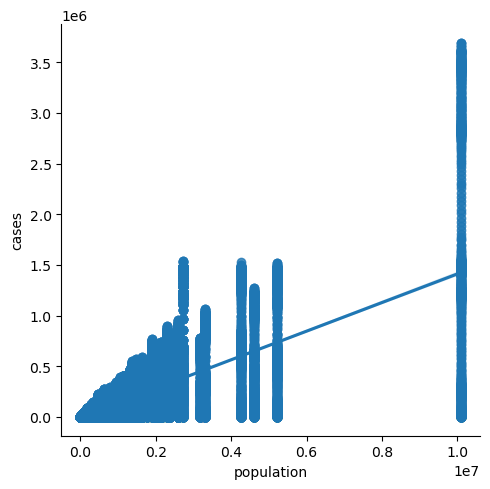

In [17]:
# Create a scatterplot for the "population" and "cases" columns in seaborn

sns.lmplot(x = 'population', y = 'cases', data = df_sub)

## Discusing the results
Overall, this graphic suggests that there is a positive linear relationship between 'population' and 'cases,' with the 'population' variable explaining a significant portion of the variance in 'cases.' However, there is still a substantial amount of unexplained variance. This suggests that while population is a predictor of cases, there are other factors at play that influence the number of cases.

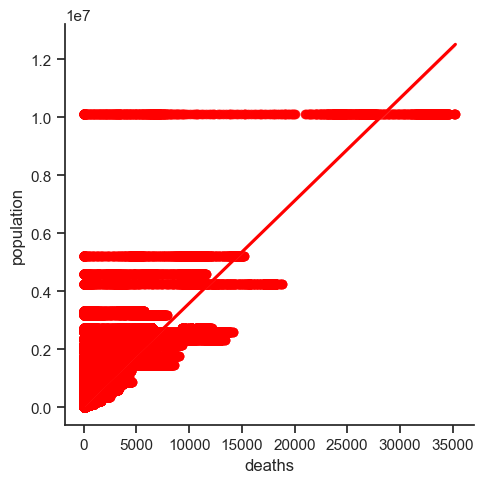

In [92]:
# Create a scatterplot for the "population" and "deaths" columns in seaborn

sns.lmplot(x = 'population', y = 'deaths', data = df_sub)

## Discusing the results
Overall, this graphic suggests that there is a positive linear relationship between 'population' and 'deaths,' with the 'population' variable explaining a substantial portion of the variance in 'deaths. There may still be some unexplained variation or other factors influencing the number of deaths.

## Pair Plots:

In [35]:
# Keep only the variables you want to use in the pair plot

sub = df[['county_code','cases','deaths', 'median_age','population', 'death_rate', 'cases_rate']]

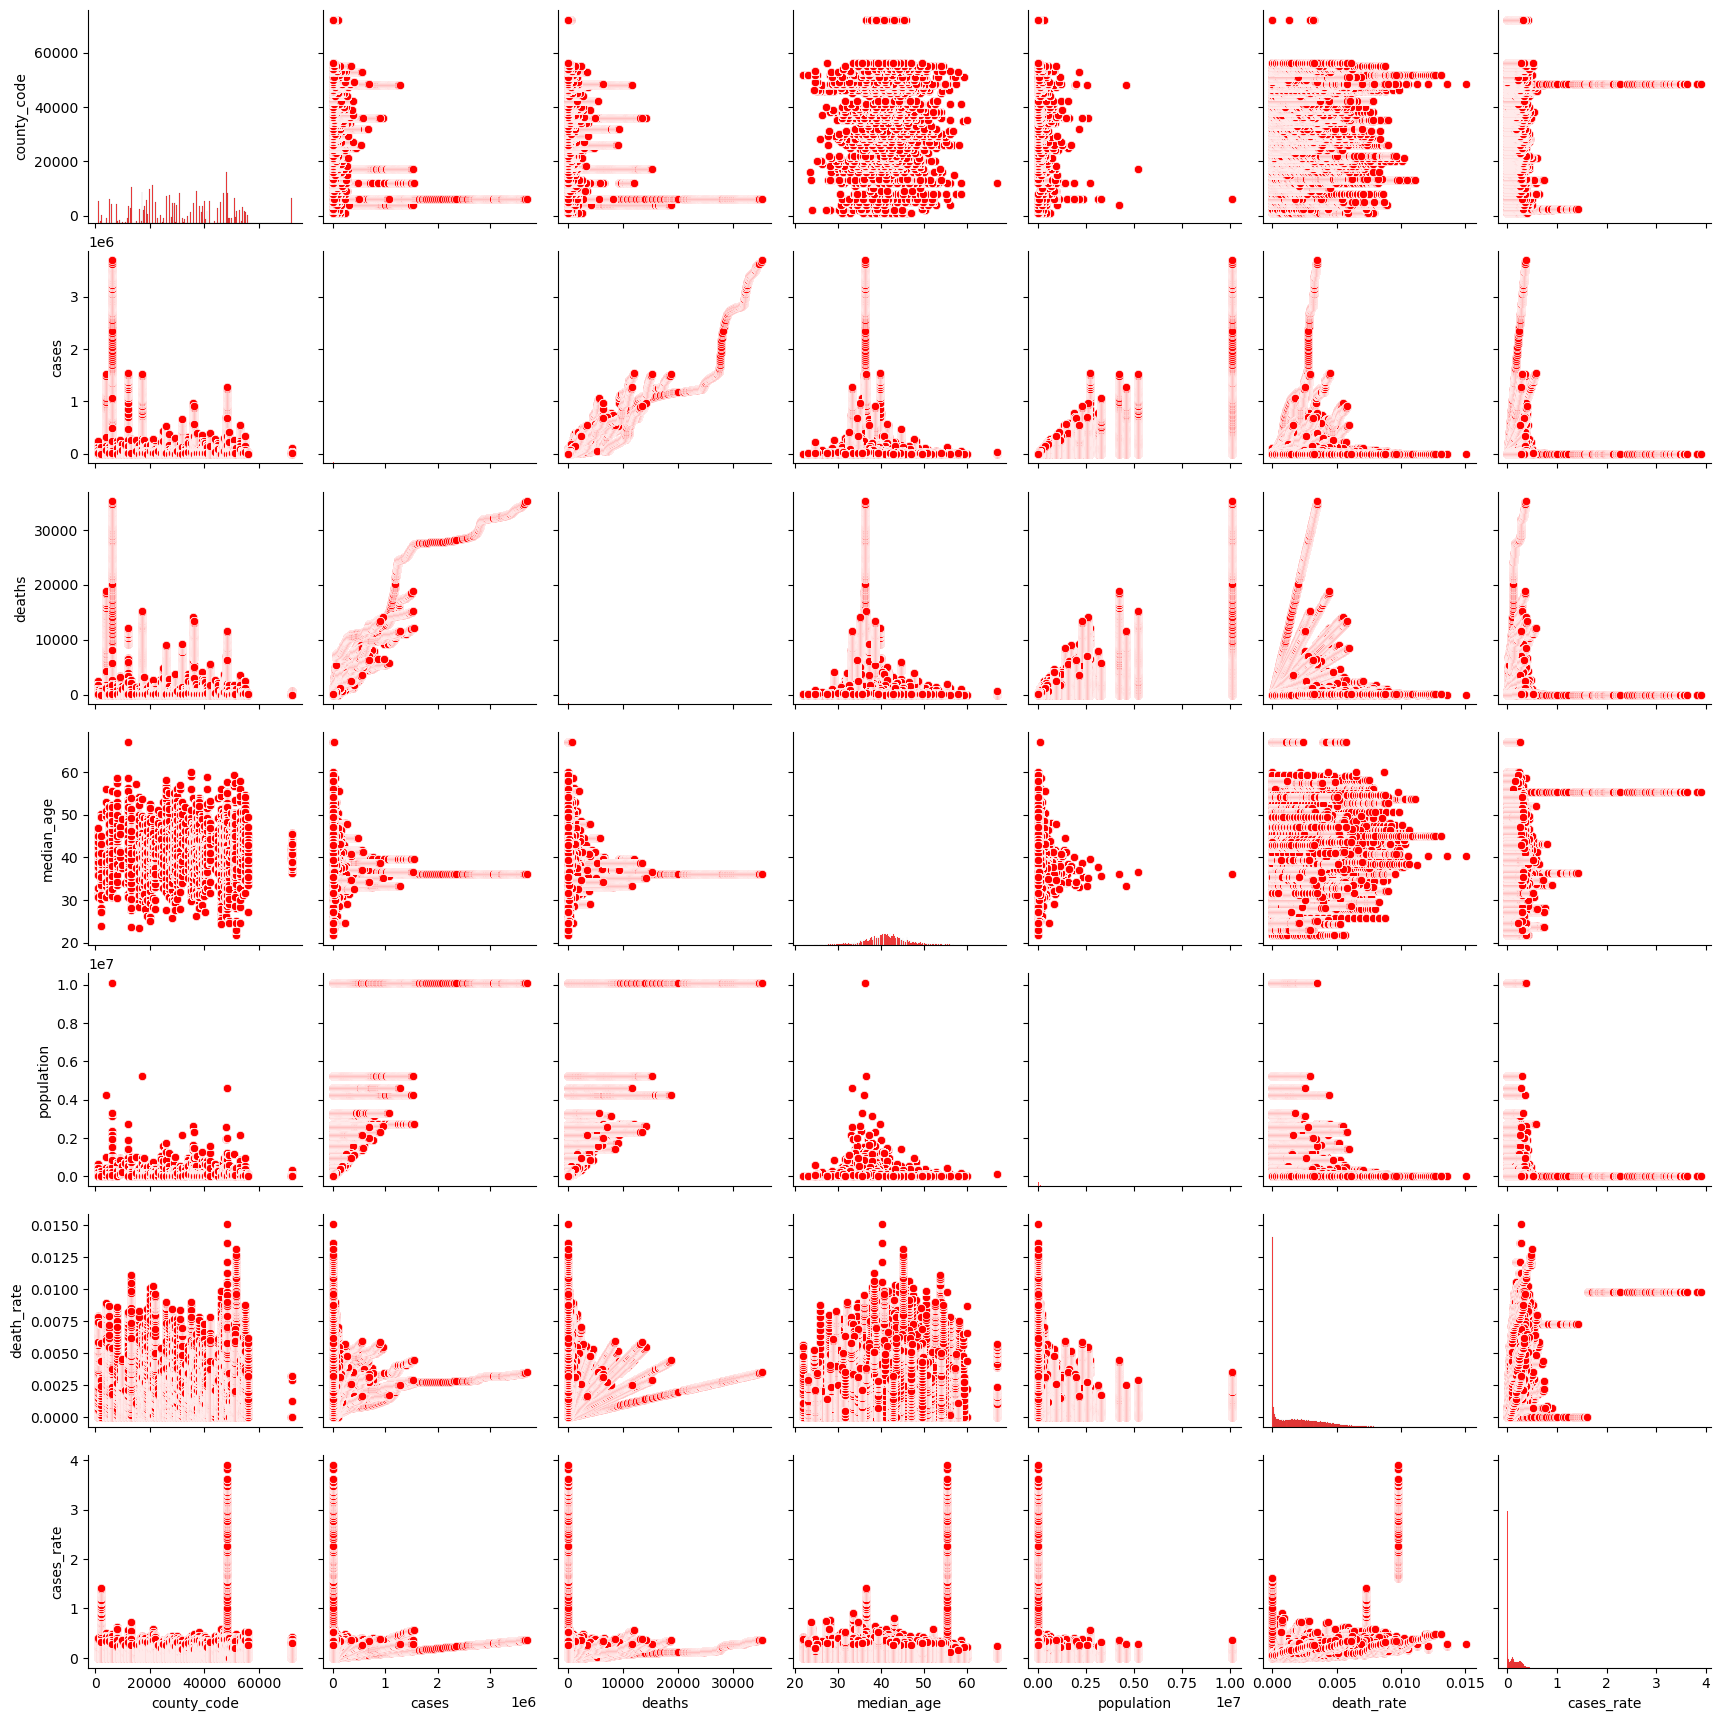

In [36]:
# Create a pair plot 

g = sns.pairplot(sub)

## Discusing the results
After visualizing the pair plot, I did not identify any other variables of interest that I would like to analyze further to address the research questions I had initially set out to answer.

### Categorical Plots:

In [ ]:
# Create a categorical plot in seaborn 

colors = ["red", "blue", "green", "purple"]
sns.set_palette(colors)
g = sns.catplot(x="cases", y="deaths",data=df, kind="bar")
plt.show()


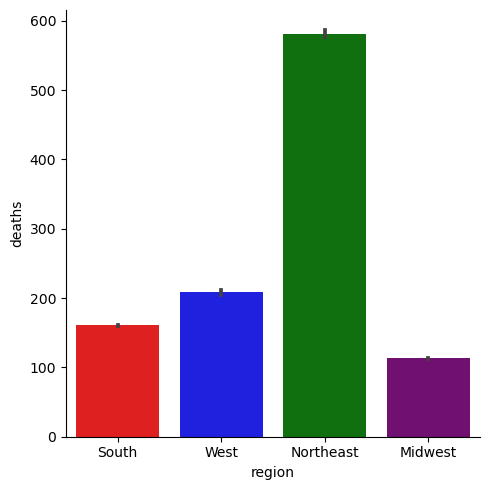

In [37]:
sns.catplot(x="region", y="deaths", kind="bar", data=df)
plt.show()

## Discusing the results
Overall the graphic show us that the Region most affected by the number of deaths related to COVID19 is the Northeast region of the USA and the least affected region is the Midwest of the country

# Define any hypotheses that you can at this point. 
##### You’ll be testing these later on.
**Hypothesis**: The higher the number of cases the higher the number of deaths